In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100

sns.set_style("whitegrid")
# plt.rcParams.update({'font.size': 32})
# sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
# plt.rcParams['figure.figsize'] = 10, 6

from datetime import datetime
str(datetime.now())

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


'2018-04-16 14:11:42.803811'

In [2]:
df = data.read_data('Vansjo/VAN1_data_2017_02_28_10_55.xlsx')
plotter = ResultsPlotter(f='/Volumes/Igor EcoHDD/Scenarios/final_fit_192.mat')
results = plotter.env_getter('water', basin=1)

/Users/imarkelo/git/MyLake_v2_Vansjo/Postproc_code/data.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


Text(0.05,0.5,'Phosphorus Concentration, $[mg / m^3]$')

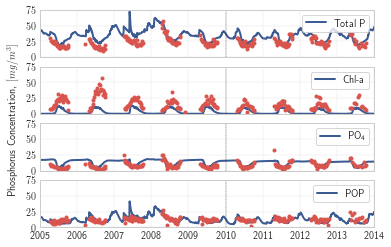

In [3]:
fig, axes = plt.subplots(4,1,sharey=True, sharex=True)

x = 'SampleDate'
env = 'water'

results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):

inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)
Chl = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl']
                                                                                      [0, 0][0:inx, :], axis=0)
PO4 = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)
Part = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)


axes[0].plot(-366 + results['days'][0, 0][0], TOTP, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
axes[1].plot(-366 + results['days'][0, 0][0], Chl, c=sns.xkcd_rgb["denim blue"], lw=2, label='Chl-a')
axes[2].plot(-366 + results['days'][0, 0][0], PO4, c=sns.xkcd_rgb["denim blue"], lw=2, label=r'PO\textsubscript{4}')
axes[3].plot(-366 + results['days'][0, 0][0], Part, c=sns.xkcd_rgb["denim blue"], lw=2, label='POP')




variable = 'TOTP'
axes[0].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

Chl = np.loadtxt('../obs/store_obs/Cha_aquaM_march_2017.dat', delimiter=',')
axes[1].plot(-366 + Chl[:, 0], Chl[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)

variable = 'PO4-P'
axes[2].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'POP'
axes[3].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)


for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 75])
    ax.set_xlim([732313 - 366, 735234 ])
    ax.plot((732313+366*4-1, 732313+366*4-1), (0, 100), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
    ax.set_yticks([0,25,50,75])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   


fig.text(0.05, 0.5, r'Phosphorus Concentration, $[mg / m^3]$', va='center', rotation='vertical')

In [4]:
import extra_methods
import metrics

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
df['date2num'] = df.SampleDate.apply(extra_methods.convert_timestamp_to_num)

### Chl-a metrics

In [6]:
x = 'SampleDate'
env = 'water'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]
Chl_s = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl'][0, 0][0:inx, :], axis=0)
Chl_o = np.loadtxt('../obs/store_obs/Cha_aquaM_march_2017.dat', delimiter=',')

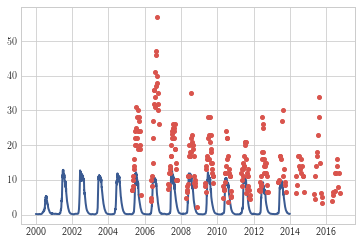

In [7]:
plt.plot(-366 + results['days'][0, 0][0], Chl_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='Chl-a')
plt.plot_date(-366+Chl_o[:, 0], Chl_o[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [8]:
days_sim = results['days'][0, 0][0]
days_obs = Chl_o[:, 0]

In [9]:
extra_methods.run_metrics(days_sim, Chl_s, Chl_o[:, 0], Chl_o[:, 1], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
mae                           	 13.07185419837927             	 7.651575123827735             
rmse                          	 15.404602724764942            	 8.583518970205224             
correlation                   	 0.5848356622576859            	 0.698411621452129             
rsquared                      	 -1.4373899629999163           	 -1.1968250663061326           
pc_bias                       	 -68.80172150957057            	 -59.939557838649165           
likelihood                    	 5.096534214643713e-06         	 1.6968950390232432e-05        
NS                            	 -1.4373899629999203           	 -1.196825066306133            


In [10]:
extra_methods.generate_latex_table(days_sim, Chl_s, Chl_o[:, 0], Chl_o[:, 1], calibration_end_date='2010-01-01')

 & 13.07 / 7.65 & -68.80 / -59.94 & 15.40 / 8.58 & 0.58 / 0.70 & -1.44 / -1.20 \\


### Total P metrics

In [11]:
df['date2num'] = df.SampleDate.apply(extra_methods.convert_timestamp_to_num)
env = 'water'
x = 'SampleDate'

In [12]:
variable = 'TOTP'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP_s = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)

In [13]:
TOTP_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

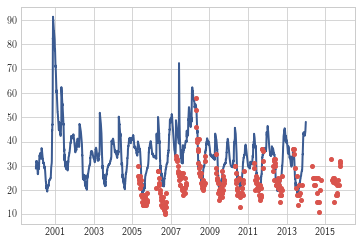

In [14]:
plt.plot(-366 + results['days'][0, 0][0], TOTP_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
plt.plot_date(-366+TOTP_o[0, :], TOTP_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [15]:
extra_methods.run_metrics(results['days'][0, 0][0], TOTP_s, TOTP_o[0,:], TOTP_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
mae                           	 9.806352998675122             	 5.581962167761587             
rmse                          	 11.794406447179009            	 7.110441900338839             
correlation                   	 0.6673885193185312            	 0.6117929001770869            
rsquared                      	 -1.3106450312285105           	 -0.5612980889174433           
pc_bias                       	 40.71673868685788             	 18.657862713191786            
likelihood                    	 9.60501542181194e-06          	 0.00040708422838362754        
NS                            	 -1.3106450312285105           	 -0.5612980889174437           


In [16]:
extra_methods.generate_latex_table(results['days'][0, 0][0], TOTP_s, TOTP_o[0,:], TOTP_o[1, :], calibration_end_date='2010-01-01')

 & 9.81 / 5.58 & 40.72 / 18.66 & 11.79 / 7.11 & 0.67 / 0.61 & -1.31 / -0.56 \\


### PO4 metrics

In [17]:
variable = 'PO4-P'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]

In [18]:
PO4_s = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)

In [19]:
PO4_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

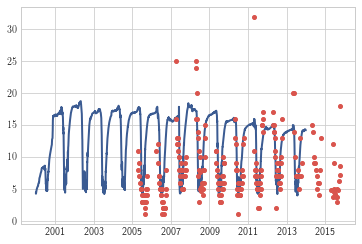

In [20]:
plt.plot(-366 + results['days'][0, 0][0], PO4_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='PO4')
plt.plot_date(-366+PO4_o[0, :], PO4_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [21]:
extra_methods.run_metrics(results['days'][0, 0][0], PO4_s, PO4_o[0,:], PO4_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
mae                           	 4.5545903473466405            	 2.666497535153354             
rmse                          	 5.43030894142085              	 3.527981701467567             
correlation                   	 0.5802843303869679            	 0.7119644861942535            
rsquared                      	 -0.48400664418729455          	 0.46870854681770446           
pc_bias                       	 48.67767902186079             	 9.855652877352206             
likelihood                    	 0.00059912924154921           	 0.07019646917192789           
NS                            	 -0.48400664418729566          	 0.4687085468177046            


In [22]:
extra_methods.generate_latex_table(results['days'][0, 0][0], PO4_s, PO4_o[0,:], PO4_o[1, :], calibration_end_date='2010-01-01')

 & 4.55 / 2.67 & 48.68 / 9.86 & 5.43 / 3.53 & 0.58 / 0.71 & -0.48 / 0.47 \\


### PP metrics

In [23]:
variable = 'POP'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]

In [24]:
PP_s = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)

In [25]:
PP_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

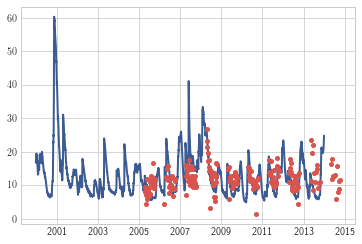

In [26]:
plt.plot(-366 + results['days'][0, 0][0], PP_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='PP')
plt.plot_date(-366+PP_o[0, :], PP_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [27]:
extra_methods.run_metrics(results['days'][0, 0][0], PP_s, PP_o[0,:], PP_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
mae                           	 4.031880957584876             	 3.2961161921314095            
rmse                          	 5.36765358095828              	 4.180505905837273             
correlation                   	 0.49302585860598497           	 0.39938418070437853           
rsquared                      	 -1.3275793803736375           	 -0.6852719444882958           
pc_bias                       	 6.991137326560411             	 -16.99133284672743            
likelihood                    	 8.825221097936764e-06         	 0.0002190173248349161         
NS                            	 -1.3275793803736362           	 -0.6852719444882958           


In [28]:
extra_methods.generate_latex_table(results['days'][0, 0][0], PP_s, PP_o[0,:], PP_o[1, :], calibration_end_date='2010-01-01')

 & 4.03 / 3.30 & 6.99 / -16.99 & 5.37 / 4.18 & 0.49 / 0.40 & -1.33 / -0.69 \\


### Oxygen



Depth: 0m
Metrics                            During calibration            After calibration             
mae                           	 1.38338127155056              	 0.7510519308328948            
rmse                          	 1.872996458552477             	 1.1323436181188447            
correlation                   	 0.4097933036669874            	 0.46606728723998153           
rsquared                      	 0.11009340452572669           	 0.19432835879500843           
pc_bias                       	 -4.651187182349398            	 -0.5440330425500159           
likelihood                    	 0.011684022399245856          	 0.017803535709844782          
NS                            	 0.11009340452572702           	 0.19432835879500898           


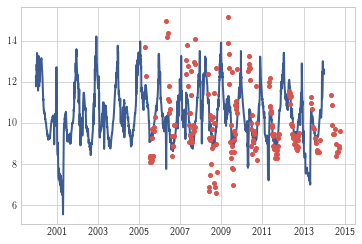



Depth: 5m
Metrics                            During calibration            After calibration             
mae                           	 1.4761251237376247            	 0.7151087887245999            
rmse                          	 1.9196608552378638            	 1.0391030989453018            
correlation                   	 0.4302266755749046            	 0.5644624432470506            
rsquared                      	 0.08642280748891096           	 0.3030801409384988            
pc_bias                       	 -6.229418094749093            	 -0.9662873161119844           
likelihood                    	 0.010379879994285022          	 0.03066604399532842           
NS                            	 0.08642280748891129           	 0.3030801409384989            


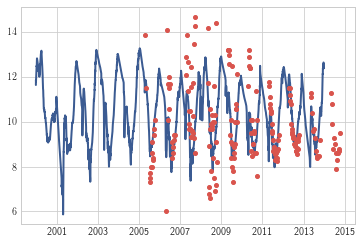



Depth: 10m
Metrics                            During calibration            After calibration             
mae                           	 1.7733674380185271            	 1.1464612565946006            
rmse                          	 2.2383964303939               	 1.4073225353201546            
correlation                   	 0.49334119506449303           	 0.5779681248591676            
rsquared                      	 0.18197599730817282           	 0.3249329810319437            
pc_bias                       	 -6.148209942013653            	 1.761369721753568             
likelihood                    	 0.01673722474580265           	 0.034206653917712555          
NS                            	 0.1819759973081725            	 0.3249329810319437            


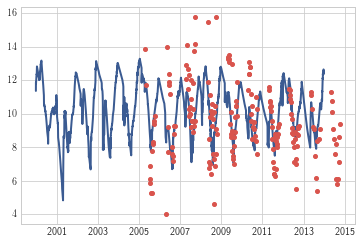



Depth: 15m
Metrics                            During calibration            After calibration             
mae                           	 1.9354098554872783            	 1.4375397336448188            
rmse                          	 2.551946462837053             	 1.726105727763143             
correlation                   	 0.542664981366566             	 0.6192570822462706            
rsquared                      	 0.2694453920450286            	 0.3234526009090094            
pc_bias                       	 -3.6269400928143307           	 5.653345063228983             
likelihood                    	 0.02591915418518595           	 0.033954394416665694          
NS                            	 0.26944539204502815           	 0.3234526009090096            


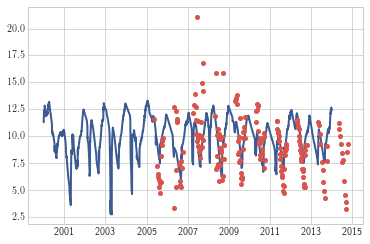



Depth: 20m
Metrics                            During calibration            After calibration             
mae                           	 1.9570503803680601            	 1.5246025542863155            
rmse                          	 2.440252105517463             	 1.9288278687159495            
correlation                   	 0.5486782091978658            	 0.5983599174798991            
rsquared                      	 0.29877023504771427           	 0.28004214718677967           
pc_bias                       	 -0.1259266302346562           	 7.520498077373948             
likelihood                    	 0.030012274687204327          	 0.027329481144220943          
NS                            	 0.2987702350477146            	 0.28004214718677967           


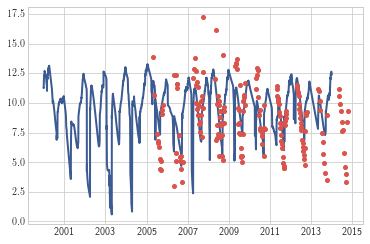



Depth: 25m
Metrics                            During calibration            After calibration             
mae                           	 1.9477324943465093            	 1.567653756054176             
rmse                          	 2.483269038277962             	 2.141108746384757             
correlation                   	 0.5632464281743049            	 0.526039665295672             
rsquared                      	 0.31604172168152467           	 0.18722851686011732           
pc_bias                       	 0.004224470534329747          	 6.897601525356709             
likelihood                    	 0.03271925973981264           	 0.017182610643097538          
NS                            	 0.316041721681525             	 0.1872285168601172            


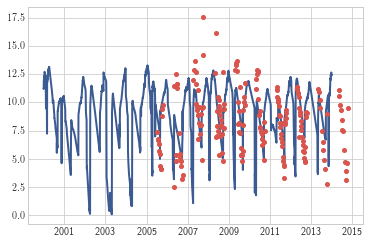



Depth: 30m
Metrics                            During calibration            After calibration             
mae                           	 2.0675467514295973            	 1.4447825155916458            
rmse                          	 2.738431001376799             	 2.1070996347984243            
correlation                   	 0.5100476722975216            	 0.5872417572120974            
rsquared                      	 0.2438788488934377            	 0.30354348042248436           
pc_bias                       	 -4.031247980497431            	 3.247623601351323             
likelihood                    	 0.022808870639919727          	 0.030737170297580503          
NS                            	 0.2438788488934377            	 0.30354348042248436           


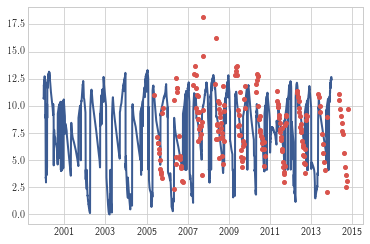



Depth: 35m
Metrics                            During calibration            After calibration             
mae                           	 2.3301782845365406            	 1.5318831240625022            
rmse                          	 3.0449825973095903            	 2.176008896630898             
correlation                   	 0.44568649625457124           	 0.6475406338687921            
rsquared                      	 0.10695615625140908           	 0.3893337954255618            
pc_bias                       	 -10.65379616545419            	 -4.717833849715078            
likelihood                    	 0.01150217399146747           	 0.047201433179828244          
NS                            	 0.10695615625140853           	 0.3893337954255617            


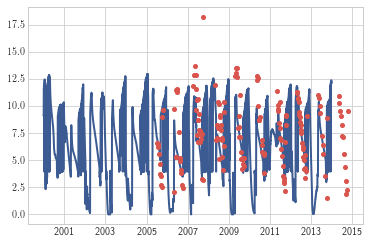



Depth: 40m
Metrics                            During calibration            After calibration             
mae                           	 2.9567136299803143            	 2.282937548963979             
rmse                          	 3.570326745680919             	 3.1216459057898156            
correlation                   	 0.5974975083260143            	 0.5117292445659968            
rsquared                      	 -0.19937020847770826          	 0.1587102781596591            
pc_bias                       	 -31.742832789666224           	 -8.29870637792193             
likelihood                    	 0.0024865699646814707         	 0.01489918732891542           
NS                            	 -0.19937020847770848          	 0.1587102781596591            


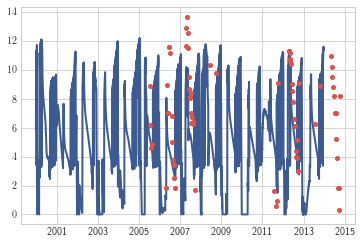

In [29]:
variable_s = 'O2'
variable_o = 'O2'
days_sim = results['days'][0, 0][0]
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['concentrations'][0, 0][variable_s][0, 0][inx, :]/1000
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print('\n\nDepth: {}m'.format(d))
    extra_methods.run_metrics(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')
    plt.plot(-366 + results['days'][0, 0][0], s, c=sns.xkcd_rgb["denim blue"], lw=2)
    plt.plot_date(-366+o[0, :], o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4, label=variable_o)
    plt.show(block=False)

### Generate table for Latex

In [30]:
variable_s = 'O2'
variable_o = 'O2'
days_sim = results['days'][0, 0][0]
for d in [0,5,10,15,20,25, 30, 35, 40]:
    print('&', end=' ')
    print(d, end=' ')
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['concentrations'][0, 0][variable_s][0, 0][inx, :]/1000
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    extra_methods.generate_latex_table(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')

& 0  & 1.38 / 0.75 & -4.65 / -0.54 & 1.87 / 1.13 & 0.41 / 0.47 & 0.11 / 0.19 \\
& 5  & 1.48 / 0.72 & -6.23 / -0.97 & 1.92 / 1.04 & 0.43 / 0.56 & 0.09 / 0.30 \\
& 10  & 1.77 / 1.15 & -6.15 / 1.76 & 2.24 / 1.41 & 0.49 / 0.58 & 0.18 / 0.32 \\
& 15  & 1.94 / 1.44 & -3.63 / 5.65 & 2.55 / 1.73 & 0.54 / 0.62 & 0.27 / 0.32 \\
& 20  & 1.96 / 1.52 & -0.13 / 7.52 & 2.44 / 1.93 & 0.55 / 0.60 & 0.30 / 0.28 \\
& 25  & 1.95 / 1.57 & 0.00 / 6.90 & 2.48 / 2.14 & 0.56 / 0.53 & 0.32 / 0.19 \\
& 30  & 2.07 / 1.44 & -4.03 / 3.25 & 2.74 / 2.11 & 0.51 / 0.59 & 0.24 / 0.30 \\
& 35  & 2.33 / 1.53 & -10.65 / -4.72 & 3.04 / 2.18 & 0.45 / 0.65 & 0.11 / 0.39 \\
& 40  & 2.96 / 2.28 & -31.74 / -8.30 & 3.57 / 3.12 & 0.60 / 0.51 & -0.20 / 0.16 \\


### Temperature



Depth: 0m
Metrics                            During calibration            After calibration             
mae                           	 1.1079717240172062            	 1.0274247716726403            
rmse                          	 1.3395557969292944            	 1.2564163043447525            
correlation                   	 0.9761693107069489            	 0.9877983652878456            
rsquared                      	 0.892863832364615             	 0.9105429755899103            
pc_bias                       	 -6.0112571752334              	 -6.835542807708535            
likelihood                    	 0.5852706798429639            	 0.6393615861975791            
NS                            	 0.892863832364615             	 0.9105429755899103            


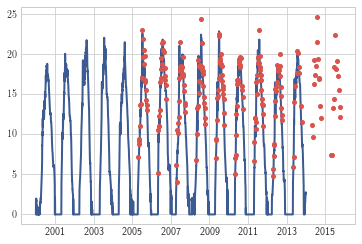



Depth: 5m
Metrics                            During calibration            After calibration             
mae                           	 0.9628797002150291            	 1.0938964765060717            
rmse                          	 1.1742126258924617            	 1.3290493837260986            
correlation                   	 0.9803172040012431            	 0.980979337812139             
rsquared                      	 0.8962585142842658            	 0.9067167723880128            
pc_bias                       	 -5.892771311108775            	 -7.086957763585009            
likelihood                    	 0.5952895050988372            	 0.6272462087090218            
NS                            	 0.8962585142842658            	 0.9067167723880128            


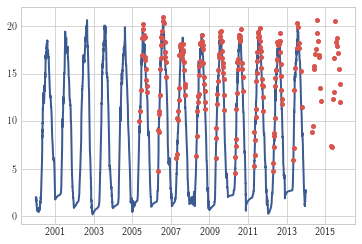



Depth: 10m
Metrics                            During calibration            After calibration             
mae                           	 0.988592688264682             	 1.112680132391795             
rmse                          	 1.2022791938738302            	 1.3998877942023074            
correlation                   	 0.938421182277403             	 0.9427199047187497            
rsquared                      	 0.8502336001901074            	 0.8635380381001436            
pc_bias                       	 -1.1673869366882075           	 -4.103024901107158            
likelihood                    	 0.4729185996565196            	 0.5054481540407265            
NS                            	 0.8502336001901075            	 0.8635380381001437            


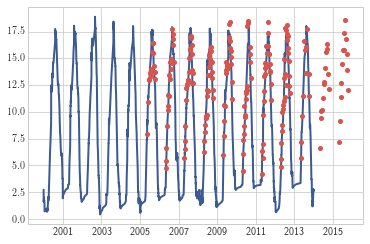



Depth: 15m
Metrics                            During calibration            After calibration             
mae                           	 1.1099182768998785            	 0.9597820022395778            
rmse                          	 1.3493043912467437            	 1.1458428424980927            
correlation                   	 0.9116592304496011            	 0.9449039064798308            
rsquared                      	 0.7773785355365448            	 0.8332771734225601            
pc_bias                       	 -0.28881928326922235          	 -0.8848348973291963           
likelihood                    	 0.3285365045342856            	 0.43447619065609955           
NS                            	 0.7773785355365448            	 0.8332771734225602            


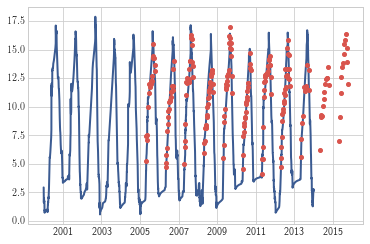



Depth: 20m
Metrics                            During calibration            After calibration             
mae                           	 1.071145088422685             	 0.8949575266396602            
rmse                          	 1.3194359464810441            	 1.0660253857136486            
correlation                   	 0.9002518477312066            	 0.9542103081383277            
rsquared                      	 0.7408273660857982            	 0.822106627007573             
pc_bias                       	 -2.2716831362880017           	 -3.8996794192406377           
likelihood                    	 0.27366154603544424           	 0.41087474609396296           
NS                            	 0.7408273660857984            	 0.8221066270075729            


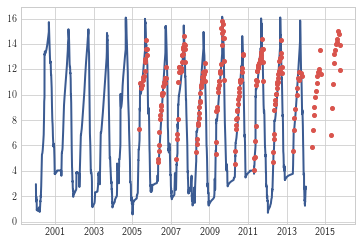



Depth: 25m
Metrics                            During calibration            After calibration             
mae                           	 1.0597153057963125            	 0.9130028798731364            
rmse                          	 1.3635841163208138            	 1.1057189912770908            
correlation                   	 0.8878726682970032            	 0.9489790003247047            
rsquared                      	 0.6947757786761135            	 0.7868669738922124            
pc_bias                       	 -3.9911003930226787           	 -5.906932825779388            
likelihood                    	 0.2173772171685419            	 0.34449864198005453           
NS                            	 0.6947757786761133            	 0.7868669738922124            


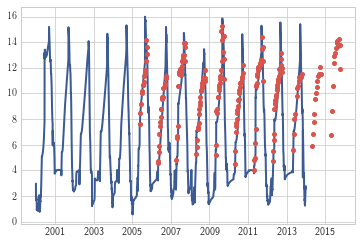



Depth: 30m
Metrics                            During calibration            After calibration             
mae                           	 1.1132967582284583            	 0.9977398170056183            
rmse                          	 1.4005995080570854            	 1.1946284596403116            
correlation                   	 0.8758233880177534            	 0.9335204921148966            
rsquared                      	 0.6477655861444418            	 0.7084667753702645            
pc_bias                       	 -4.8142393641710575           	 -7.444181060599512            
likelihood                    	 0.17184333345061145           	 0.23277891858103555           
NS                            	 0.6477655861444414            	 0.7084667753702647            


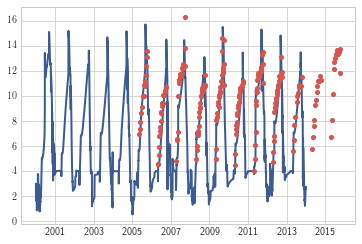



Depth: 35m
Metrics                            During calibration            After calibration             
mae                           	 1.1227903233888024            	 1.2041887702535459            
rmse                          	 1.3965528717691582            	 1.5812856045494201            
correlation                   	 0.8822282016699713            	 0.8565343730970185            
rsquared                      	 0.5787570300994818            	 0.3835711680826476            
pc_bias                       	 -5.679723965991418            	 -9.701128273619162            
likelihood                    	 0.12169773998943907           	 0.04586081823984258           
NS                            	 0.5787570300994821            	 0.38357116808264724           


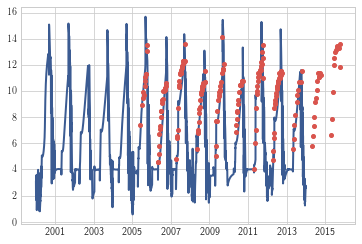



Depth: 40m
Metrics                            During calibration            After calibration             
mae                           	 1.0231132143717645            	 1.6706291668245086            
rmse                          	 1.3697685138363511            	 2.1880758602548642            
correlation                   	 0.8854674241349121            	 0.6925259119771118            
rsquared                      	 0.5933587105982991            	 -0.16060539274165864          
pc_bias                       	 -8.825722179324822            	 -11.677595014427885           
likelihood                    	 0.13091507518866888           	 0.0030184043030518576         
NS                            	 0.5933587105982993            	 -0.16060539274165841          


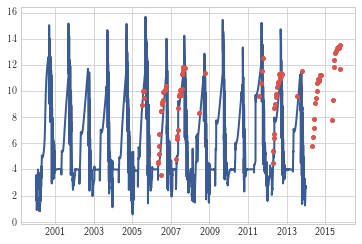

In [31]:
variable_o = 'Temperatur'
days_sim = results['days'][0, 0][0]
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['T'][0, 0][inx, :]
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print('\n\nDepth: {}m'.format(d))
    extra_methods.run_metrics(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')
    plt.figure()
    plt.plot(-366 + results['days'][0, 0][0], s, c=sns.xkcd_rgb["denim blue"], lw=2)
    plt.plot_date(-366+o[0, :], o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4, label=variable_o)
    plt.show(block=False)

In [32]:
variable_o = 'Temperatur'
days_sim = results['days'][0, 0][0]
days_sim = results['days'][0, 0][0]
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['T'][0, 0][inx, :]
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print('&', end=' ')
    print(d, end=' ')
    extra_methods.generate_latex_table(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')

& 0  & 1.11 / 1.03 & -6.01 / -6.84 & 1.34 / 1.26 & 0.98 / 0.99 & 0.89 / 0.91 \\
& 5  & 0.96 / 1.09 & -5.89 / -7.09 & 1.17 / 1.33 & 0.98 / 0.98 & 0.90 / 0.91 \\
& 10  & 0.99 / 1.11 & -1.17 / -4.10 & 1.20 / 1.40 & 0.94 / 0.94 & 0.85 / 0.86 \\
& 15  & 1.11 / 0.96 & -0.29 / -0.88 & 1.35 / 1.15 & 0.91 / 0.94 & 0.78 / 0.83 \\
& 20  & 1.07 / 0.89 & -2.27 / -3.90 & 1.32 / 1.07 & 0.90 / 0.95 & 0.74 / 0.82 \\
& 25  & 1.06 / 0.91 & -3.99 / -5.91 & 1.36 / 1.11 & 0.89 / 0.95 & 0.69 / 0.79 \\
& 30  & 1.11 / 1.00 & -4.81 / -7.44 & 1.40 / 1.19 & 0.88 / 0.93 & 0.65 / 0.71 \\
& 35  & 1.12 / 1.20 & -5.68 / -9.70 & 1.40 / 1.58 & 0.88 / 0.86 & 0.58 / 0.38 \\
& 40  & 1.02 / 1.67 & -8.83 / -11.68 & 1.37 / 2.19 & 0.89 / 0.69 & 0.59 / -0.16 \\


In [33]:
import metrics

In [35]:
from extra_methods import find_indexes_of_dates

In [49]:
variable_o = 'Temperatur'
calibration_end_date='2010-01-01'
days_sim = results['days'][0, 0][0]
mtds = [metrics.mae, metrics.bias, metrics.rmse, metrics.correlation, metrics.rsquared]
depths = [0,5,10,15,20,25, 30, 35, 40]
for m in mtds:
    av = 0
    for d in depths:
        inx = np.where(results['z'][0, 0] == d)[0][0]
        values_sim = results['T'][0, 0][inx, :]
        o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
        days_obs = o[0,:]
        values_obs = o[1,:]
        idxs_sim_before, idxs_sim_after = find_indexes_of_dates(
            days_sim, days_obs, calibration_end_date=calibration_end_date)
        idxs_obs_before, idxs_obs_after = find_indexes_of_dates(
            days_obs, days_sim, calibration_end_date=calibration_end_date)
        av+=((m(values_sim.take(idxs_sim_before), values_obs.take(idxs_obs_before))+m(values_sim.take(idxs_sim_after), values_obs[:,].take(idxs_obs_after)))/2)
    #     print('&', end=' ')
    print(av/len(depths))
    #     print(d, end=' ')
#         extra_methods.generate_latex_table(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')

1.0796513679450763
-0.6099461343498604
1.3434568661451871
0.9155767809575927
0.7070388925050741
